In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [10]:
def run(filename, period, cash):

    data = pd.read_csv('quotes/' + filename, parse_dates=['<DATE>'])
    data.columns = [d[1:-1].lower() for d in data.columns]
    data['sma'] = data.close.rolling(window=period).mean()
    data['dev'] = data.close - data.sma
    data['deal'] = np.nan

    ingame = False

    for i in range(period + 1, len(data) - 1):
        if ingame is False and data.dev[i-2] < 0 and data.dev[i-1] >= 0:
            data.loc[i, 'deal'] = 'in'
            ingame = True
        if ingame is True and data.dev[i-1] < 0:
            data.loc[i, 'deal'] = 'out'
            ingame = False

    deals = data[data.deal.notna()].copy()
    deals['profit'] = deals.open.rolling(window=2).apply(lambda x: (x[1] - x[0]) / x[0], raw=True)
    deals['total'] = deals.profit + 1
    deals = deals[deals['deal'] == 'out'].loc[:, ['date', 'profit', 'total']]
    deals.index = range(len(deals))
    deals.dropna(inplace=True)    
    
    win = len(deals[deals.profit > 0])
    loss = len(deals[deals.profit <= 0])
    percent_of_win = round(len(deals[deals.profit > 0]) * 100 / len(deals), 2)
    sharp = round(deals.profit.mean() / deals.profit.std(), 2)

    worse = round(min(deals.profit * cash), 2)
    best = round(max(deals.profit * cash), 2)
#     total = round(sum(deals.profit * cash) + 10000, 2)
    total = round(sum(deals.profit * cash - 6 - (deals.profit + 1) * 6) + 10000, 2)

    res = cash
    drawdown = np.inf

    for p in deals.profit:
        res += res * p
        if drawdown > res:
            drawdown = res
    
    return filename.split('_')[0], period, win, loss, percent_of_win, sharp, \
           worse, best, total, round(drawdown, 2), round(res, 2)

In [11]:
files = os.listdir('quotes')
arr = []

for file in files:
    for i in range(7,21):
        arr.append(run(file, i, 10000))

In [12]:
data = pd.DataFrame(arr)
data.columns = ['quote', 'per', 'win', 'loss', '% of win', 'sharp', 
                'worse', 'best', 'total', 'drawdown', 'cumsum']

In [13]:
data.sort_values(by=['total'], ascending=False)

,quote,per,win,loss,% of win,sharp,worse,best,total,drawdown,cumsum
70,PLZL,7,55,89,38.19,0.24,-924.37,5542.52,33088.85,10361.56,86913.73
78,PLZL,15,31,57,35.23,0.26,-924.37,5666.18,29206.97,9671.29,56057.87
77,PLZL,14,35,55,38.89,0.26,-924.37,5645.16,29141.36,10463.92,56282.58
80,PLZL,17,30,53,36.14,0.23,-924.37,5596.29,29140.29,9726.70,51149.26
83,PLZL,20,28,47,37.33,0.25,-924.37,5380.91,28878.60,9831.31,50765.55
71,PLZL,8,47,85,35.61,0.22,-924.37,5444.77,28846.69,10367.13,57498.45
79,PLZL,16,34,57,37.36,0.22,-924.37,5650.05,28212.14,9726.70,49003.85
72,PLZL,9,47,84,35.88,0.21,-924.37,5422.16,27970.98,9759.43,53011.47
76,PLZL,13,36,60,37.50,0.24,-924.37,5757.58,27886.61,9814.92,50541.38
14,TGKA,7,50,87,36.50,0.18,-563.65,6263.51,27801.48,9510.21,49592.55


In [14]:
data.to_csv('SMA_vs_close_result.csv')

In [15]:
data = pd.read_csv('SMA_vs_close_result.csv')
data['sharp_total'] = data.sharp * data.total

In [16]:
data.quote.unique()

array(['TATNP', 'TGKA', 'UPRO', 'CHMF', 'SBER', 'PLZL', 'VTBR', 'AKRN',
       'SNGSP', 'SNGS', 'SBERP', 'RSTI', 'TATN', 'ALRS'], dtype=object)

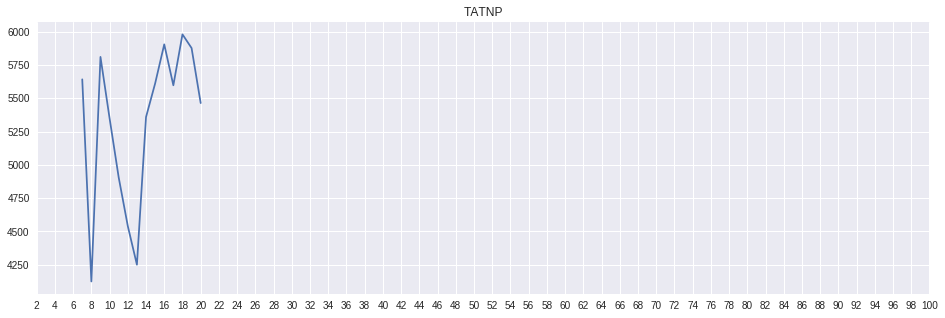

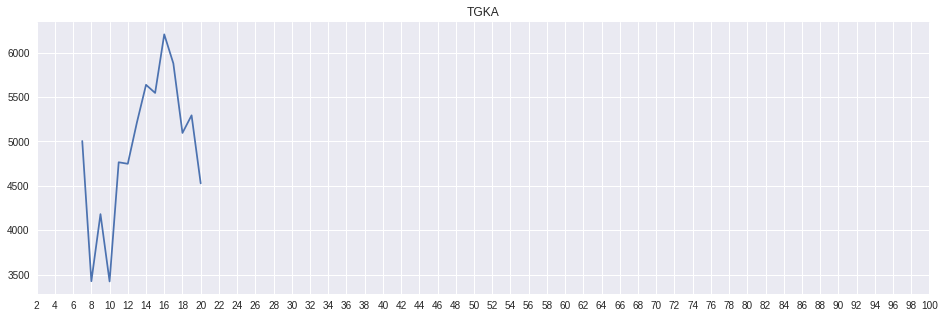

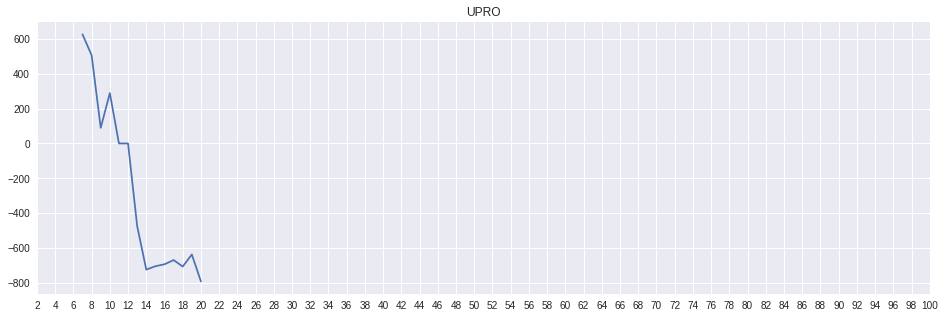

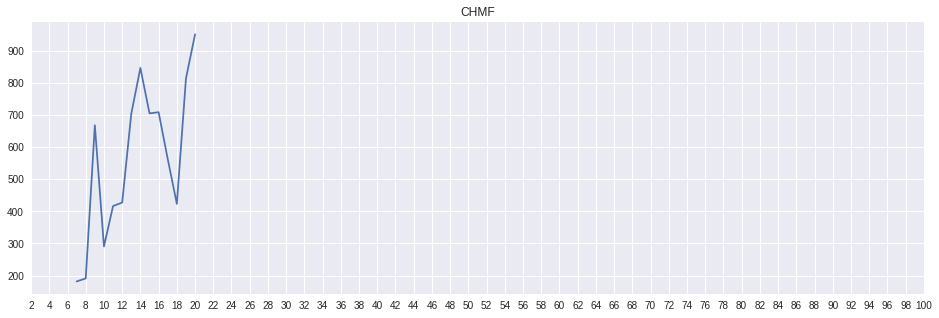

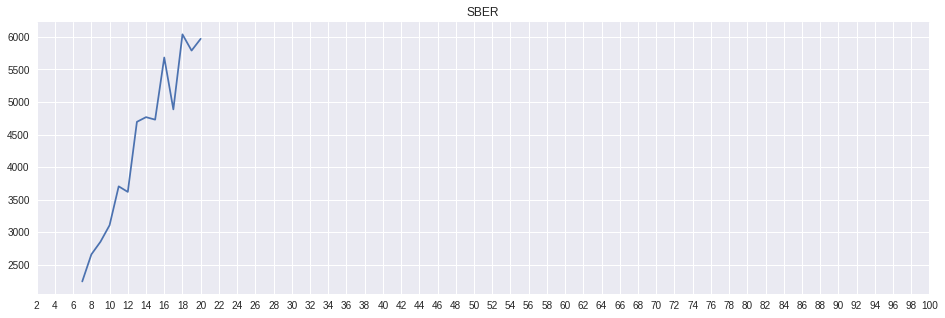

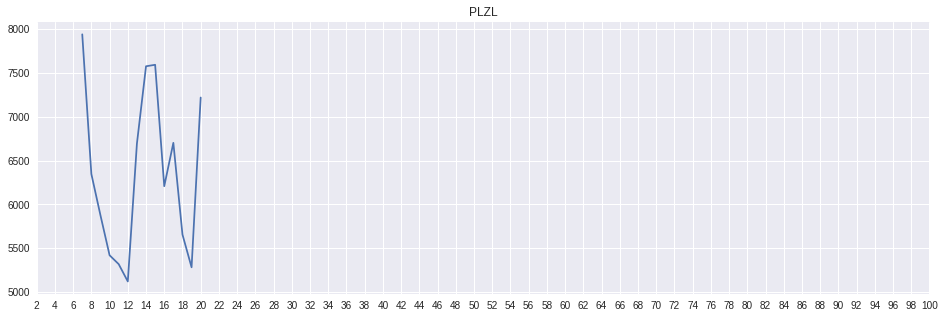

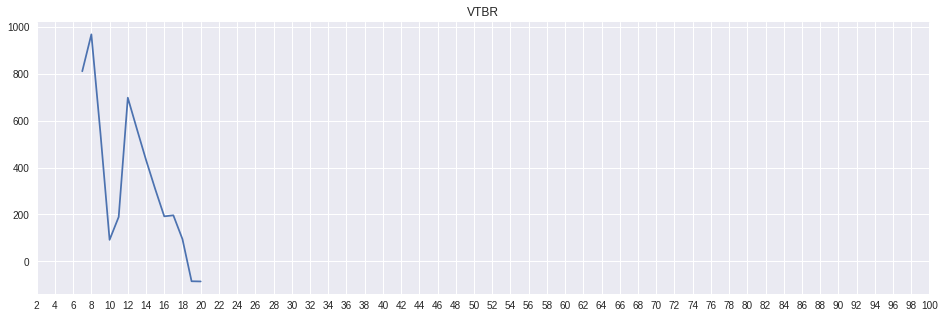

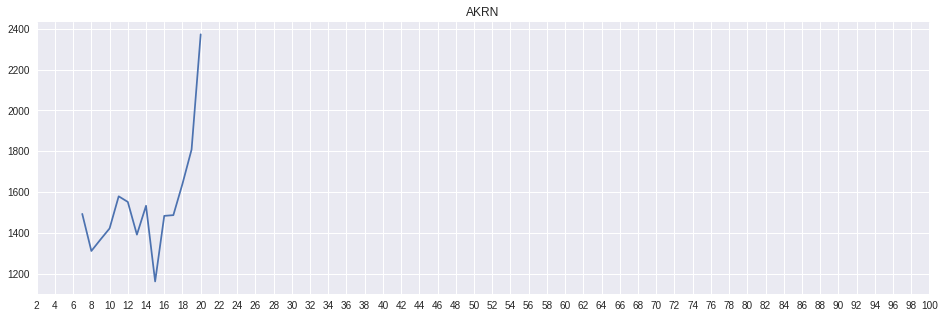

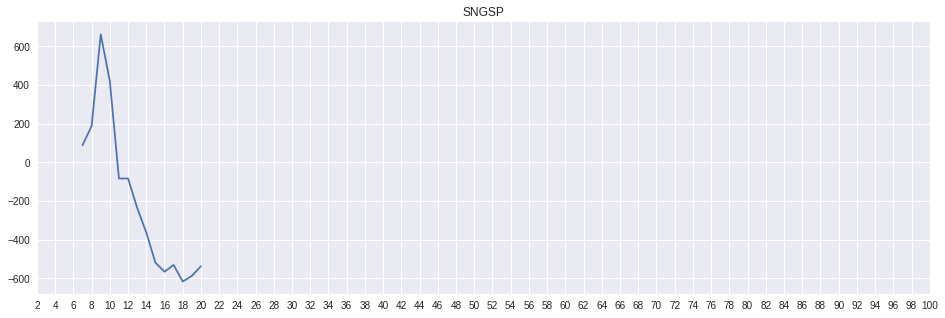

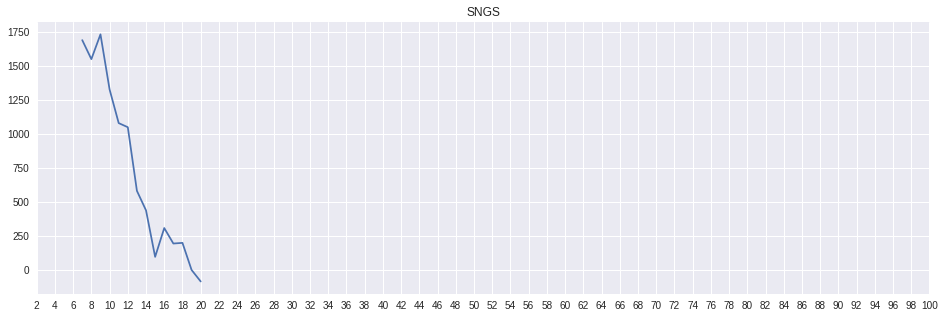

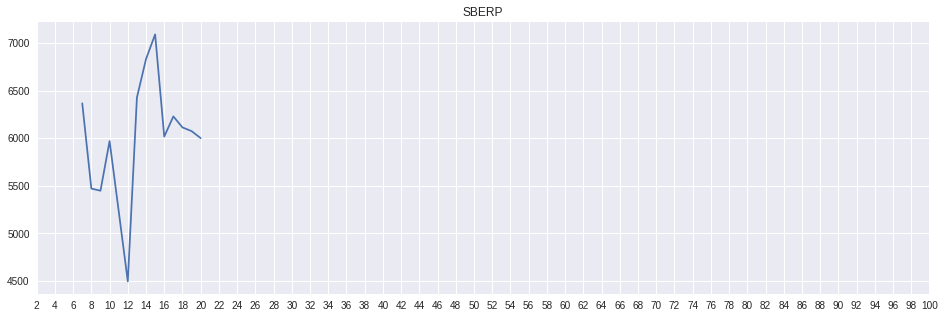

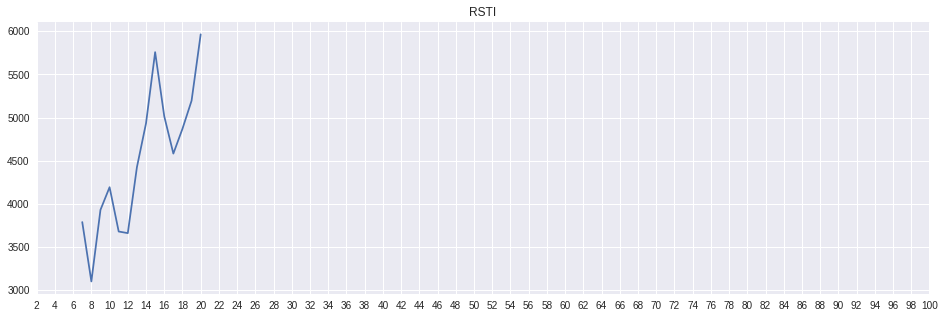

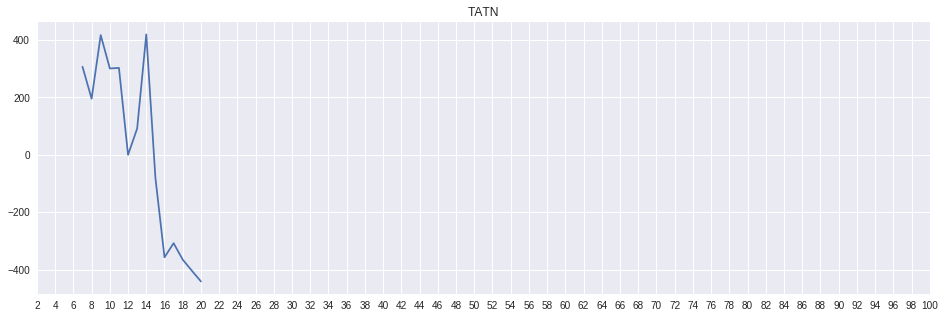

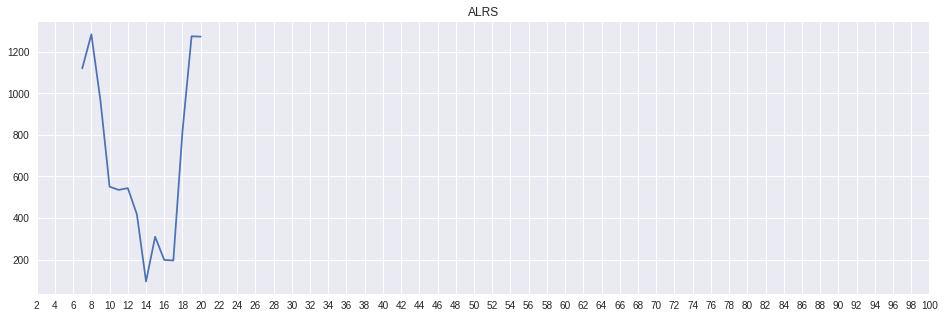

In [17]:
for quote in data.quote.unique():
    x = data[data.quote == quote].per
    y = data[data.quote == quote].sharp_total
    plt.figure(figsize=(16, 5))
    plt.plot(x, y)
    plt.title(quote)
    plt.xticks(np.arange(2, 101, 2))

In [25]:
data[data.per==20].sort_values(by=['sharp'], ascending=False)

,Unnamed: 0,quote,per,win,loss,% of win,sharp,worse,best,total,drawdown,cumsum,sharp_total
69,69,SBER,20,26,40,39.39,0.28,-398.84,3122.25,21324.05,9689.65,29338.62,5970.7340
13,13,TATNP,20,25,41,37.88,0.27,-515.14,2806.03,20237.57,8703.85,26660.23,5464.1439
153,153,SBERP,20,31,38,44.93,0.27,-1340.81,3611.94,22228.30,10678.84,31563.19,6001.6410
83,83,PLZL,20,28,47,37.33,0.25,-924.37,5380.91,28878.60,9831.31,50765.55,7219.6500
167,167,RSTI,20,17,52,24.64,0.22,-917.37,5309.84,27110.06,10045.27,39566.05,5964.2132
27,27,TGKA,20,25,48,34.25,0.20,-1152.10,4480.77,22638.89,8711.10,29310.36,4527.7780
111,111,AKRN,20,30,45,40.00,0.16,-736.98,2445.18,14833.06,8197.66,16361.57,2373.2896
195,195,ALRS,20,19,49,27.94,0.10,-689.27,2347.37,12731.51,8731.36,13049.16,1273.1510
55,55,CHMF,20,21,53,28.38,0.08,-482.12,2027.63,11884.10,9742.17,12126.80,950.7280
97,97,VTBR,20,16,57,21.92,-0.01,-755.01,3346.68,8582.06,6861.29,8732.97,-85.8206


In [19]:
arr_ = []

for per in range(2, 101):
    arr_.append(data[data.per==per].sort_values(by=['sharp_total'], ascending=False).head(5).sum())

In [22]:
data_ = pd.DataFrame(arr_)
data_.per = data_.per // 5
data_.sharp = data_.sharp / 5

data_.loc[:, ['quote', 'per', 'win', 'loss', 'sharp', 'total', 'cumsum']].sort_values(by=['sharp'], ascending=False).head(25)

,quote,per,win,loss,sharp,total,cumsum
18,PLZLSBERPSBERRSTITATNP,20.0,127.0,218.0,0.258,119778.58,177893.64
13,PLZLSBERPRSTITATNPTGKA,15.0,154.0,262.0,0.252,126260.06,202470.80
16,SBERPSBERTATNPPLZLTGKA,18.0,138.0,227.0,0.252,115658.85,165675.10
14,PLZLTGKASBERPTATNPSBER,16.0,162.0,245.0,0.252,120161.44,185391.96
17,SBERPTATNPSBERTGKAPLZL,19.0,137.0,226.0,0.250,114631.96,162425.98
15,PLZLSBERPTGKATATNPSBER,17.0,147.0,230.0,0.250,117794.28,176854.09
12,PLZLSBERPTGKATATNPRSTI,14.0,166.0,270.0,0.244,124905.07,199438.31
11,PLZLSBERPTGKASBERRSTI,13.0,168.0,287.0,0.226,121592.94,185679.08
5,PLZLSBERPTATNPTGKARSTI,7.0,269.0,423.0,0.214,133591.34,256913.10
9,PLZLSBERPTATNPTGKASBER,11.0,199.0,319.0,0.212,113409.46,167721.74
